In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
data=pd.read_csv('/content/drive/MyDrive/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
def apply_on_data(function):
  data['Message']=data['Message'].apply(function)
  return data['Message'][1]

In [6]:
import re
def remove_html(data):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',data)

In [7]:
apply_on_data(remove_html)

'Ok lar... Joking wif u oni...'

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def stopwords_removal(text):
  new_text=[]
  for w in text.split():
    if w in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(w)
  return ''.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
stopwords_removal(data['Message'][1])

'Ok lar... Joking wif u oni...'

In [10]:
apply_on_data(stopwords_removal)

'Ok lar... Joking wif u oni...'

In [11]:
import string
def remove_punctuations(text):
  for w in string.punctuation:
    text.replace(w,'')
  return text

In [12]:
remove_punctuations(data['Message'][1])

'Ok lar... Joking wif u oni...'

In [13]:
apply_on_data(remove_punctuations)

'Ok lar... Joking wif u oni...'

In [14]:
data['Category']=data['Category'].map({'ham':1,'spam':0})

In [15]:
data['Message']=data['Message'].astype(str)

In [16]:
X=data['Message']
y=data['Category']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(4457, 1115, 4457, 1115)

In [18]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [19]:
tokenizer=Tokenizer(num_words=4457,oov_token='nothing')
tokenizer.fit_on_texts(X_train)

In [20]:
sequence=tokenizer.texts_to_sequences(X_train)
padded=pad_sequences(sequence,padding='post',maxlen=100)

In [21]:
padded_n=np.array(padded)
padded_n

array([[ 505, 3807, 3808, ...,    0,    0,    0],
       [ 255,  811, 1271, ...,    0,    0,    0],
       [ 138, 3809,    8, ...,    0,    0,    0],
       ...,
       [ 461,    6,   44, ...,    0,    0,    0],
       [  87,   78,   18, ...,    0,    0,    0],
       [1021,  809,   91, ...,    0,    0,    0]], dtype=int32)

In [22]:
model=keras.Sequential([
    keras.layers.Embedding(4457,24,input_length=100),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 24)           106968    
                                                                 
 global_average_pooling1d (  (None, 24)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                400       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 107385 (419.47 KB)
Trainable params: 107385 (419.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [24]:
model.fit(padded_n,y_train,epochs=30,verbose=2)

Epoch 1/30
140/140 - 24s - loss: 0.4913 - accuracy: 0.8452 - 24s/epoch - 173ms/step
Epoch 2/30
140/140 - 11s - loss: 0.3393 - accuracy: 0.8658 - 11s/epoch - 78ms/step
Epoch 3/30
140/140 - 4s - loss: 0.2780 - accuracy: 0.8658 - 4s/epoch - 30ms/step
Epoch 4/30
140/140 - 1s - loss: 0.1890 - accuracy: 0.9096 - 1s/epoch - 10ms/step
Epoch 5/30
140/140 - 4s - loss: 0.1305 - accuracy: 0.9659 - 4s/epoch - 27ms/step
Epoch 6/30
140/140 - 1s - loss: 0.0788 - accuracy: 0.9789 - 1s/epoch - 10ms/step
Epoch 7/30
140/140 - 1s - loss: 0.0534 - accuracy: 0.9847 - 1s/epoch - 10ms/step
Epoch 8/30
140/140 - 2s - loss: 0.0413 - accuracy: 0.9886 - 2s/epoch - 15ms/step
Epoch 9/30
140/140 - 2s - loss: 0.0339 - accuracy: 0.9897 - 2s/epoch - 15ms/step
Epoch 10/30
140/140 - 1s - loss: 0.0288 - accuracy: 0.9919 - 1s/epoch - 8ms/step
Epoch 11/30
140/140 - 1s - loss: 0.0244 - accuracy: 0.9937 - 810ms/epoch - 6ms/step
Epoch 12/30
140/140 - 2s - loss: 0.0223 - accuracy: 0.9942 - 2s/epoch - 11ms/step
Epoch 13/30
140/140

In [25]:
print(data.head())

   Category                                            Message
0         1  Go until jurong point, crazy.. Available only ...
1         1                      Ok lar... Joking wif u oni...
2         0  Free entry in 2 a wkly comp to win FA Cup fina...
3         1  U dun say so early hor... U c already then say...
4         1  Nah I don't think he goes to usf, he lives aro...


In [26]:
test=['Even my brother is not like to speak with me']
sequence=tokenizer.texts_to_sequences(test)
padded=pad_sequences(sequence,padding='post',maxlen=100,truncating='post')
model.predict(padded)

1/1 [==============================] - 0s 113ms/step


array([[0.99969375]], dtype=float32)

In [27]:
test=['SIX chances to win CASH! From 100 to 20,000 po']
sequence=tokenizer.texts_to_sequences(test)
padded=pad_sequences(sequence,padding='post',maxlen=100,truncating='post')
model.predict(padded)

1/1 [==============================] - 0s 26ms/step


array([[0.01529238]], dtype=float32)

## Bert Model

In [28]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.1 MB/s eta 0:00:00


In [30]:
import tensorflow_text

In [31]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [32]:
def get_sentence_embeding(sentences):
  preprocessed_text=bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

In [34]:
text_input=keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)

l=keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=keras.layers.Dense(1,activation='sigmoid',name='output')(l)

model=keras.Model(inputs=[text_input],outputs=[l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [38]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=METRICS
)

In [39]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
140/140 [==============================] - 48s 322ms/step - loss: 0.3236 - accuracy: 0.8694 - precision: 0.8718 - recall: 0.9956
Epoch 2/10
140/140 [==============================] - 46s 327ms/step - loss: 0.2284 - accuracy: 0.8954 - precision: 0.9000 - recall: 0.9891
Epoch 3/10
140/140 [==============================] - 46s 331ms/step - loss: 0.1890 - accuracy: 0.9293 - precision: 0.9339 - recall: 0.9883
Epoch 4/10
140/140 [==============================] - 47s 338ms/step - loss: 0.1660 - accuracy: 0.9376 - precision: 0.9420 - recall: 0.9889
Epoch 5/10
140/140 [==============================] - 47s 338ms/step - loss: 0.1492 - accuracy: 0.9473 - precision: 0.9528 - recall: 0.9881
Epoch 6/10
140/140 [==============================] - 48s 342ms/step - loss: 0.1371 - accuracy: 0.9547 - precision: 0.9588 - recall: 0.9902
Epoch 7/10
140/140 [==============================] - 48s 340ms/step - loss: 0.1284 - accuracy: 0.9560 - precision: 0.9598 - recall: 0.9907
Epoch 8/10
140/140 [

In [40]:
model.evaluate(X_test,y_test)

35/35 [==============================] - 13s 329ms/step - loss: 0.1083 - accuracy: 0.9740 - precision: 0.9756 - recall: 0.9948


[0.10831763595342636,
 0.9739910364151001,
 0.9756345152854919,
 0.9948239922523499]

In [41]:
y_preds=model.predict(X_test)
y_preds=y_preds.flatten()

35/35 [==============================] - 12s 335ms/step


In [51]:
import numpy as np
ypreds=np.where(y_preds>0.5,1,0)
ypreds[:5]

array([1, 1, 1, 1, 1])

In [52]:
y_test[:5]

89      1
1111    1
2537    1
3408    1
3592    1
Name: Category, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypreds)
cm

array([[125,  24],
       [  5, 961]])

Text(50.722222222222214, 0.5, 'Actual')

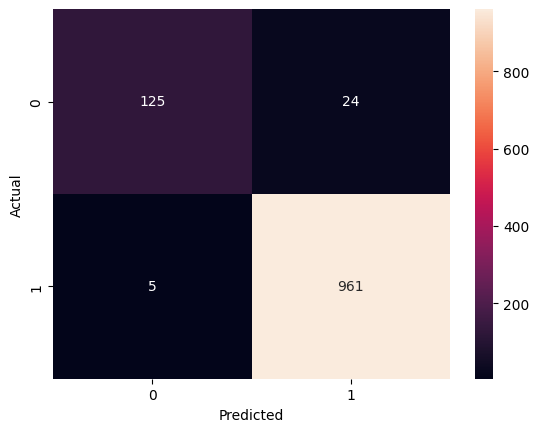

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')